In [1]:
#### Projeto: Desafio ZAP
#### Programa para Análise Exploratória do Dataset source-4-ds-train.json do ZAP (para Todos os imóveis)
#### Autor: Rodolfo Bugarin

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carregar o Dataframe

In [4]:
import pickle

In [5]:
df = pickle.load(open('source-4-ds-train.pickle', 'rb'))

In [6]:
pd.set_option('display.max_columns', 999)  ### para o pandas mostrar mais colunas.

In [7]:
df.head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
0,São Paulo,BR,,-23.612923,-46.614222,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim da...,Jardim da Saúde,São Paulo,Rua Juvenal Galeno,53,,04290030,Zona Sul,3.0,4.0,2017-02-07T13:21:40Z,"04 dorms sendo 01 suíte e closet, sala de esta...",787c7bd19d,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,6.0,SALE,NaN,NaN,700000,NaN,NaN,STANDARD,f4603b2b52,1.0,PRÓXIMO A AVENIDA PRESIDENTE TANCREDO NEVES,388.0,TWO_STORY_HOUSE,2018-12-06T19:27:12.623Z,388.0
1,São Paulo,BR,,-23.643962,-46.593475,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Liviero,Vila Santa Teresa (Zona Sul),São Paulo,Rua Juruaba,16,,04187320,Zona Sul,2.0,3.0,2016-03-21T18:35:17Z,"03 dorms sendo 01 suíte, sala, sala de jantar,...",4d68c0cdbe,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2.0,SALE,NaN,NaN,336000,NaN,NaN,STANDARD,f4603b2b52,1.0,PRÓXIMO A FACULDADE UNIP CAMPUS ANCHIETA,129.0,HOME,2018-12-12T13:17:23.547Z,129.0
2,São Paulo,,,-23.568559,-46.647452,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Cerqueira C...,Bela Vista,São Paulo,Avenida Paulista,402,,01311000,,4.0,0.0,2018-12-18T23:47:03.425Z,"Andar com 395,70m² de área útil, 04 wcs, 05 va...",e7e0b554ac,[http://static.nidoimovel.com.br/d3d9446802a44...,ACTIVE,False,5.0,RENTAL,4900.0,MONTHLY,24929,29829.0,4040.0,STANDARD,501f6d5e94,0.0,Excelente Conjunto Comercial na Av. Paulista,NaN,COMMERCIAL_PROPERTY,NaN,396.0
3,São Paulo,,,-23.598023,-46.682781,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia,Vila Olímpia,São Paulo,Rua Alvorada,1190,,04550004,,2.0,3.0,2018-10-26T16:18:28.915Z,"Viva melhor e de um jeito novo, com privilégio...",6654d93423,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2.0,SALE,686.0,NaN,739643,NaN,1610.0,STANDARD,527c7b0cc0,1.0,"Apartamento com 80m², 2 vagas próximo ao Parqu...",80.0,APARTMENT,2018-11-08T16:38:35.434Z,80.0
4,São Paulo,,,-23.582497,-46.653027,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Paraiso,Paraíso,São Paulo,Rua Curitiba,380,,04005030,,5.0,4.0,2018-12-14T18:06:51.342Z,Sua área é ocupada majoritariamente por instit...,9ffaf676ae,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,5.0,SALE,6230.0,NaN,7520099,NaN,18900.0,STANDARD,527c7b0cc0,4.0,"Apartamento 332m², 4 suítes à venda próximo ao...",332.0,APARTMENT,2018-12-14T18:06:55.140Z,3322.0


In [8]:
df.shape

(133964, 37)

In [9]:
# Análise de Missings

In [10]:
features = df.columns.tolist()[0:]

In [11]:
for i in features:
    print (i + '    :    ' + str(sum(df[i].isnull())))

address_city    :    0
address_country    :    0
address_district    :    0
address_geolocation_location_lat    :    11
address_geolocation_location_lon    :    11
address_geolocation_precision    :    11
address_locationid    :    0
address_neighborhood    :    0
address_state    :    0
address_street    :    0
address_streetnumber    :    0
address_unitnumber    :    0
address_zipcode    :    0
address_zone    :    0
bathrooms    :    913
bedrooms    :    3019
createdat    :    0
description    :    0
id    :    0
images    :    0
listingstatus    :    0
owner    :    0
parkingspaces    :    4425
pricinginfos_businesstype    :    0
pricinginfos_monthlycondofee    :    16837
pricinginfos_period    :    104913
pricinginfos_price    :    0
pricinginfos_rentaltotalprice    :    105250
pricinginfos_yearlyiptu    :    19352
publicationtype    :    0
publisherid    :    0
suites    :    13617
title    :    0
totalareas    :    42832
unittypes    :    0
updatedat    :    6597
usableareas    

In [12]:
df[df.pricinginfos_price >= 0].pricinginfos_price.count() # Verificando que todos os imóveis tem preço de venda

133964

In [13]:
df[df['bathrooms'].isnull()]

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
201,São Paulo,,,-23.743619,-46.668233,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Parque Re...,Parque Residencial Cocaia,São Paulo,Rua Mario Montico,212,,04849150,Zona Sul,NaN,NaN,2018-12-07T06:18:29.460Z,<b>Observações:</b> CÓD.:ON2611-18 \nTerreno c...,e82bf06599,[http://www.cocimoveis.com.br/imoveis/fotos/on...,ACTIVE,False,0.0,SALE,0.0,NaN,45150,NaN,0.0,STANDARD,1730c7e521,NaN,Terreno para Venda - Parque Residencial Cocaia...,NaN,COMMERCIAL_ALLOTMENT_LAND,NaN,NaN
212,São Paulo,,,-23.738839,-46.709646,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Fl...,Jardim Floresta,São Paulo,Rua Gonçalo Soares de Franca,175,,04836030,Zona Sul,NaN,NaN,2018-12-07T06:04:24.266Z,"Terreno comercial próximo ao cento, condução n...",700d978b6b,[http://static.nidoimovel.com.br/3dd48ab31d016...,ACTIVE,False,NaN,RENTAL,0.0,MONTHLY,7000,7000.0,0.0,STANDARD,75dca8cd95,NaN,"Terreno comercial próximo ao cento, condução n...",381.0,COMMERCIAL_ALLOTMENT_LAND,NaN,NaN
266,São Paulo,,,-23.611063,-46.693812,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Brooklin,Brooklin Paulista,São Paulo,Rua Arandu,57,,04562030,,NaN,NaN,2019-02-20T23:18:45.404Z,Prédio comercial com excelente imagem corporat...,b3f1524611,[http://web-gestor.net/wg5/arq/00839_20642/fot...,ACTIVE,False,2.0,RENTAL,1045.0,MONTHLY,3500,4545.0,207.0,STANDARD,c5f07d6bf3,NaN,"00716 - Comercial, BROOKLIN - SÃO PAULO/SP",NaN,SHED_DEPOSIT_WAREHOUSE,NaN,66.0
268,São Paulo,,,-23.593855,-46.735370,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Vila Sonia,Vila Sônia,São Paulo,Avenida Professor Francisco Morato,4065,,05520100,,NaN,NaN,2019-02-20T23:18:46.799Z,"Casa para locação, uso comercial, ideal para c...",e7b86142b7,[http://web-gestor.net/wg5/arq/00839_20642/fot...,ACTIVE,False,NaN,RENTAL,0.0,MONTHLY,3849,3849.0,0.0,STANDARD,c5f07d6bf3,NaN,Imóvel para Clínica,200.0,SHED_DEPOSIT_WAREHOUSE,NaN,160.0
283,São Paulo,,,-23.607255,-46.694061,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Brooklin,Cidade Monções,São Paulo,Rua Flórida,1670,,04565001,,NaN,NaN,2019-02-20T23:18:45.389Z,Conjunto com excelente imagem corporativa,32b9019714,[http://web-gestor.net/wg5/arq/00839_20642/fot...,ACTIVE,False,2.0,RENTAL,1295.0,MONTHLY,4200,5495.0,434.0,STANDARD,c5f07d6bf3,NaN,"00934 - Comercial, BROOKLIN - SÃO PAULO/SP",NaN,SHED_DEPOSIT_WAREHOUSE,NaN,104.0
312,São Paulo,,,-23.650071,-46.729349,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Jardim Sa...,Jardim São Luís,São Paulo,Avenida Maria Coelho Aguiar,215,,05804900,,NaN,NaN,2019-02-20T23:18:46.148Z,Laje - Centro Empresarial de São Paulo Conjunt...,9aae5ea4e2,[http://web-gestor.net/wg5/arq/00839_20642/fot...,ACTIVE,False,14.0,RENTAL,0.0,MONTHLY,45787,45787.0,0.0,STANDARD,c5f07d6bf3,NaN,"01164 - Comercial, JARDIM SÃO LUIZ - SÃO PAUL...",NaN,SHED_DEPOSIT_WAREHOUSE,NaN,1422.0
320,São Paulo,,,-23.611063,-46.693812,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Brooklin,Brooklin Paulista,São Paulo,Rua Arandu,57,,04562030,,NaN,NaN,2019-02-20T23:18:45.389Z,Prédio comercial com excelente imagem corporat...,e4e8283666,[http://web-gestor.net/wg5/arq/00839_20642/fot...,ACTIVE,False,4.0,RENTAL,1873.0,MONTHLY,7000,8873.0,579.0,STANDARD,c5f07d6bf3,NaN,"00717 - Comercial, BROOKLIN - SÃO PAULO/SP",NaN,SHED_DEPOSIT_WAREHOUSE,NaN,132.0
325,São Paulo,,,-23.602625,-46.692685,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Brooklin,Cidade Monções,São Paulo,Rua Quintana,887,,04569011,,NaN,NaN,2019

In [14]:
df_temp = df[df.pricinginfos_businesstype == 'RENTAL']

In [15]:
features = df_temp.columns.tolist()[0:]

In [16]:
for i in features:
    print (i + '    :    ' + str(sum(df_temp[i].isnull())))

address_city    :    0
address_country    :    0
address_district    :    0
address_geolocation_location_lat    :    5
address_geolocation_location_lon    :    5
address_geolocation_precision    :    5
address_locationid    :    0
address_neighborhood    :    0
address_state    :    0
address_street    :    0
address_streetnumber    :    0
address_unitnumber    :    0
address_zipcode    :    0
address_zone    :    0
bathrooms    :    245
bedrooms    :    1740
createdat    :    0
description    :    0
id    :    0
images    :    0
listingstatus    :    0
owner    :    0
parkingspaces    :    1460
pricinginfos_businesstype    :    0
pricinginfos_monthlycondofee    :    2820
pricinginfos_period    :    0
pricinginfos_price    :    0
pricinginfos_rentaltotalprice    :    13
pricinginfos_yearlyiptu    :    1607
publicationtype    :    0
publisherid    :    0
suites    :    3912
title    :    0
totalareas    :    8857
unittypes    :    0
updatedat    :    2070
usableareas    :    67


In [17]:
# Análise de Frequencia de variáveis categóricas

In [18]:
df.groupby('address_city').address_city.count()

address_city
São Paulo    133964
Name: address_city, dtype: int64

In [19]:
df.groupby('address_country').address_country.count()

address_country
      120112
BR     13852
Name: address_country, dtype: int64

In [20]:
df.groupby('address_district').address_district.count()

address_district
           133951
Jaraguá        11
Jaçanã          2
Name: address_district, dtype: int64

In [21]:
df.groupby('address_geolocation_precision').address_geolocation_precision.count()

address_geolocation_precision
APPROXIMATE            7090
GEOMETRIC_CENTER      37623
NO_GEOCODE               30
RANGE_INTERPOLATED    14137
ROOFTOP               75073
Name: address_geolocation_precision, dtype: int64

In [22]:
df.groupby('address_locationid').address_locationid.count()

address_locationid
BR>Rio Grande do Sul>NULL>Novo Hamburgo>Barrios>Canudos             1
BR>Sao Paulo>NULL>Atibaia>Barrios>Vila Dom Pedro                    1
BR>Sao Paulo>NULL>Barueri>Barrios>Jardim Itaquiti                   1
BR>Sao Paulo>NULL>Campinas>Barrios>Jardim Paulistano                1
BR>Sao Paulo>NULL>Cotia>Barrios>Centro                              1
BR>Sao Paulo>NULL>Diadema>Barrios>Taboao                            1
BR>Sao Paulo>NULL>Espirito Santo do Pinhal>Barrios>Centro           1
BR>Sao Paulo>NULL>Guaruja>Barrios>Enseada                           1
BR>Sao Paulo>NULL>Guarulhos>Barrios>Gopouva                         1
BR>Sao Paulo>NULL>Itu>Barrios>Itu                                   2
BR>Sao Paulo>NULL>Itupeva>Barrios>Jardim Alegre                     1
BR>Sao Paulo>NULL>Mogi das Cruzes>Barrios>Arua                      1
BR>Sao Paulo>NULL>Osasco>Barrios>Cidade Sao Francisco               4
BR>Sao Paulo>NULL>Osasco>Barrios>Conceicao                          2
B

In [23]:
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==True].groupby('address_locationid').address_locationid.count()

address_locationid
BR>Sao Paulo>NULL>Sao Paulo>Centro>Aclimacao                                                        722
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bela Vista                                                      2547
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bixiga                                                             1
BR>Sao Paulo>NULL>Sao Paulo>Centro>Bom Retiro                                                        64
BR>Sao Paulo>NULL>Sao Paulo>Centro>Campos Eliseos                                                   108
BR>Sao Paulo>NULL>Sao Paulo>Centro>Caninde                                                            6
BR>Sao Paulo>NULL>Sao Paulo>Centro>Centro                                                           625
BR>Sao Paulo>NULL>Sao Paulo>Centro>Cerqueira Cesar                                                 1201
BR>Sao Paulo>NULL>Sao Paulo>Centro>Consolacao                                                      1754
BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopol

In [24]:
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==False].address_locationid.count()

90

In [25]:
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==False]

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
26,São Paulo,,,-23.646971,-46.738922,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo,Jardim Monte Azul,São Paulo,Rua Hermógenes Lima,50,,05836230,,3.0,3.0,2018-10-25T21:43:13.349Z,O sobrado de 140 metros quadrados está localiz...,b5f8a5c8d2,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,4.0,SALE,0.0,NaN,385000,NaN,0.0,STANDARD,a8b38b03a8,1.0,Sobrado para venda possui 140 metros quadrados...,140.0,TWO_STORY_HOUSE,2018-12-14T23:26:29.795Z,140.0
181,São Paulo,,,-23.648012,-46.737438,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo,Jardim Monte Azul,São Paulo,Rua Hermógenes Lima,230,,05836230,,3.0,3.0,2018-10-30T18:31:38.215Z,O sobrado tem 140 metros quadrados no bairro J...,cd8afaeb9e,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,4.0,SALE,0.0,NaN,399000,NaN,0.0,STANDARD,a8b38b03a8,1.0,Sobrado para venda tem 140 metros quadrados e ...,140.0,TWO_STORY_HOUSE,2018-12-05T12:01:29.530Z,140.0
1105,São Paulo,BR,,-23.562510,-46.756252,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Osasco>Barrios>Cidade Sao Fr...,Cidade São Francisco,São Paulo,Rua Doutor Hélio Fidélis,,,05351035,Zona Oeste,0.0,3.0,2015-05-10T19:53:37Z,LINDA COBERTURA NA VILA SÃO FRANCISCO COM EXCE...,01531d86fb,[http://wgc.quickfast.com/brilhoimoveis/fotos/...,ACTIVE,False,2.0,SALE,0.0,NaN,546000,NaN,0.0,STANDARD,08df1bf698,1.0,Apartamento em Osasco,0.0,APARTMENT,2018-11-08T13:53:51.022Z,144.0
2932,São Paulo,BR,,-23.487476,-46.657280,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,Vila Gouveia,São Paulo,Travessa Américo Bologna,17,,02541120,Zona Norte,1.0,2.0,2016-02-15T02:51:33Z,"São 2 casas, sendo a 1ª com 2 dorms, sala, coz...",7bded89778,[http://degust.gestaoreal.com.br/arquivos/imob...,ACTIVE,False,0.0,SALE,NaN,NaN,210000,NaN,NaN,STANDARD,8f3ea7170b,0.0,casa - Vila Gouveia - São Paulo,70.0,HOME,2018-10-29T00:47:22.209Z,70.0
3494,São Paulo,,,-23.566084,-46.653771,ROOFTOP,BR>Sao Paulo>NULL>Campinas>Barrios>Jardim Paul...,Jardim Paulista,São Paulo,Alameda Campinas,540,,01404000,Zona Sul,1.0,1.0,2018-01-16T22:08:44.892Z,,a9910de3d9,[http://images.ingaiasites.com.br/xksjzXyUrMgl...,ACTIVE,False,1.0,RENTAL,0.0,MONTHLY,2380,2380.0,0.0,STANDARD,c9a62f21bc,0.0,"Flat residencial para locação, Jardim Paulista...",NaN,FLAT,2018-11-21T19:50:24.173Z,30.0
3631,São Paulo,,,-23.581462,-46.791648,APPROXIMATE,BR>Sao Paulo>NULL>Sao Paulo,Jardim Boa Vista (Zona Oeste),São Paulo,Rodovia Raposo Tavares,00,,05576100,,0.0,0.0,2018-10-15T15:23:51.158Z,Últimos lotes aproveita oportunidade unica.\n\...,6b731b6764,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,0.0,SALE,140.0,NaN,41993000,NaN,489.0,STANDARD,522711243a,0.0,Terreno / Lote Residencial para venda. Com 100...,1000.0,RESIDENTIAL_ALLOTMENT_LAND,2018-11-08T16:35:52.824Z,1000.0
4130,São Paulo,BR,,-23.506393,-46.723918,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,City América,São Paulo,Avenida Cardeal Motta,397,,05101210,Zona Oeste,1.0,3.0,2018-05-29T14:44:30.670Z,Excelente apartamento com 3 dormitórios (o ter...,5afb652c7a,[http://imobeximg.s3.amazonaws.com/7/131f383b4...,ACTIVE,False,1.0,SALE,567.0,NaN,350000,NaN,0.0,PREMIUM,71670b0bee,0.0,Venda Apartamento 3 Dorm 1 Ban 1 Gar São Paulo SP,0.0,APARTMENT,2018-11-08T14:13:22.626Z,0.0
4694,São Paulo,BR,,-23.614822,-46.747614,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo,Super Quadra Morumbi,São Paulo,Rua Diogo Pereira,297,,05750130,,2.0,2.0,2017-10-27T18:28:41.057Z,O apartamento de 63 metros quadrados n

In [26]:
df.groupby('address_neighborhood').address_neighborhood.count()

address_neighborhood
                               21
176                             3
204                             4
A. Pinheiros                    4
Aclimação                     565
Adalgisa                        1
Aeroporto                       2
Agua Rasa                       1
Alto Klabin                    10
Alto Mandaqui                   1
Alto da Boa Vista              19
Alto da Lapa                  273
Alto da Mooca                 513
Alto de Pinheiros             955
Alto do Pari                    9
Altos de Vila Prudente          6
Americanópolis                  4
Anhanguera                      2
Aricanduva                     24
Artur Alvim                    65
BROOKLIN                        2
Balneário São Francisco         1
Balneário São José              1
Barra Funda                   182
Barro Branco                    8
Barro Branco (Zona Norte)     117
Bela Aliança                   11
Bela Vista                   2534
Belenzinho                 

In [27]:
df.groupby('address_state').address_state.count()

address_state
                       3
SP                   246
Santa Catarina         1
São Paulo         133714
Name: address_state, dtype: int64

In [28]:
df.groupby('address_street').address_street.count()

address_street
                                                7002
9 de Julho                                         6
Acesso Pintassilgo Rosa                            1
Alameda 2 Sargento Andiras Nogueira de Abreu       1
Alameda 2° Sargento Geraldo Berti                  1
Alameda Afonso Schmidt                            89
Alameda Agenor Couto Magalhães                     2
Alameda Barros                                    33
Alameda Barão de Limeira                          18
Alameda Barão de Piracicaba                        1
Alameda Calicut                                    2
Alameda Campinas                                 389
Alameda Casa Branca                              149
Alameda Dino Bueno                                 1
Alameda Eduardo Prado                              4
Alameda Fernão Cardim                            138
Alameda Franca                                   345
Alameda Gabriel Monteiro da Silva                 40
Alameda Glete                  

In [29]:
df.groupby('address_zipcode').address_zipcode.count()

address_zipcode
            5908
00000000    1646
00000001       1
00004053       1
00004164       1
00004265       1
00004269       2
00123101       4
00231710       1
00311800       1
00335050       4
00336010      11
00426001      17
00429500       2
00452090       1
00456900       2
00458000       9
00541100       1
00552817       1
01000000       5
01000001       3
01000600       1
01001000       6
01001001       6
01002001       1
01003000       7
01003001       5
01003900       3
01003904       2
01004010       2
            ... 
33219000       3
33250000       4
33430000       6
34140100       3
34770000       1
35660000       1
37330000       4
40030028       2
40464000       4
40779030       4
40780000       1
40810000       1
41080000       4
41272432       7
43020210       2
45539000       1
47049020       1
53500000       3
53729020       2
56880000       1
57344150       1
57670000       1
59052700       2
64550000       6
67300000       1
69940000       2
85926800      1

In [30]:
df.groupby('address_zone').address_zone.count()

address_zone
              116265
Centro          3243
Zona Leste      3107
Zona Norte      3847
Zona Oeste      2309
Zona Sul        5193
Name: address_zone, dtype: int64

In [31]:
df[df['address_locationid'].str.contains("BR>Sao Paulo>NULL>Sao Paulo>")==False].groupby('address_zone').address_zone.count()

address_zone
              74
Zona Leste     2
Zona Norte     3
Zona Oeste     7
Zona Sul       4
Name: address_zone, dtype: int64

In [32]:
df.groupby('listingstatus').listingstatus.count()

listingstatus
ACTIVE    133964
Name: listingstatus, dtype: int64

In [33]:
df.groupby('owner').owner.count()

owner
False    133926
True         38
Name: owner, dtype: int64

In [34]:
df.groupby('pricinginfos_businesstype').pricinginfos_businesstype.count()

pricinginfos_businesstype
RENTAL     28632
SALE      105332
Name: pricinginfos_businesstype, dtype: int64

In [35]:
df.groupby('pricinginfos_period').pricinginfos_period.count()

pricinginfos_period
DAILY         19
MONTHLY    29029
YEARLY         3
Name: pricinginfos_period, dtype: int64

In [36]:
df[df['pricinginfos_period'].isin(['DAILY', 'YEARLY'])]

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
1825,São Paulo,,,-23.554033,-46.650235,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Centro>Bela Vista,Bela Vista,São Paulo,Rua Paim,,,01306010,Centro,1.0,1.0,2018-11-13T04:20:16.700Z,O Paim SP 182 é uma bela propriedade do bairro...,f331bd2ea0,[http://dx577khz83dc.cloudfront.net/2840/7b602...,ACTIVE,False,1.0,RENTAL,0.0,DAILY,106,NaN,0.0,STANDARD,847e8f49f8,NaN,Sao Paulo - Apartamento Padrão - Bela Vista,NaN,APARTMENT,2018-11-13T20:04:03.328Z,37.0
2080,São Paulo,,,-23.577564,-46.636284,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Mariana,Vila Mariana,São Paulo,Rua Doutor Nicolau de Sousa Queirós,759,,04105002,Zona Sul,2.0,2.0,2016-07-12T18:36:04Z,O Nicolau SP 128 é um dos apartamentos para al...,1bdd950670,[http://dx577khz83dc.cloudfront.net/2840/3bbfb...,ACTIVE,False,NaN,RENTAL,0.0,DAILY,200,NaN,0.0,STANDARD,847e8f49f8,NaN,Sao Paulo - Apartamento Padrão - Vila Mariana,NaN,APARTMENT,2018-11-16T20:23:26.487Z,70.0
2250,São Paulo,,,-23.473664,-46.601099,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Norte>Vila Ma...,Vila Mazzei,São Paulo,Rua Guaraja,,,02310010,Zona Norte,1.0,1.0,2018-11-13T04:20:54.947Z,"<p style=""text-align: justify;"" align=""justify...",78aaa26a82,[http://dx577khz83dc.cloudfront.net/2840/2cb24...,ACTIVE,False,1.0,RENTAL,0.0,DAILY,106,NaN,0.0,STANDARD,847e8f49f8,NaN,Sao Paulo - Apartamento Padrão - Vila Mazzei,NaN,APARTMENT,2018-11-13T20:04:03.391Z,37.0
3310,São Paulo,,,-23.594289,-46.669601,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Nova...,Vila Nova Conceição,São Paulo,Rua Balthazar da Veiga,,,04510001,Zona Sul,1.0,1.0,2018-11-13T04:22:36.314Z,"<p id=""tw-target-text"" class=""tw-data-text tw-...",e8ab0b8350,[http://dx577khz83dc.cloudfront.net/2840/0df10...,ACTIVE,False,1.0,RENTAL,0.0,DAILY,169,NaN,0.0,STANDARD,847e8f49f8,NaN,Sao Paulo - Apartamento Padrão - Vila Nova Con...,NaN,APARTMENT,2018-11-13T20:04:03.596Z,59.0
4885,São Paulo,,,-23.572668,-46.752462,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Jardim ...,Jardim Ivana,São Paulo,Avenida José Joaquim Seabra,700,,05364000,,1.0,2.0,2018-10-11T14:20:15.964Z,"Ótimo sobrado comercial, com dois dormitórios ...",11c8654823,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2.0,RENTAL,0.0,DAILY,1400,1400.0,0.0,STANDARD,c0de129662,0.0,"Excelente sobrado com 02 dormitórios, sala ampla!",125.0,TWO_STORY_HOUSE,2018-11-08T15:54:18.029Z,120.0
17633,São Paulo,,,-23.607077,-46.662393,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Moema,Indianópolis,São Paulo,Alameda dos Jurupis,,,,,2.0,1.0,2016-10-31T13:31:51Z,CONSULTE SEMPRE ANTES A DISPONIBILIDADE !!! &...,eea2d773f0,[http://www.moemaflat.com.br/imagens/imoveis/2...,ACTIVE,False,1.0,RENTAL,NaN,DAILY,2800,NaN,0.0,STANDARD,f0d94d02ac,1.0,"Flat para Temporada em São Paulo, MOEMA, 1 dor...",NaN,FLAT,2019-02-21T11:53:30.749Z,52.0
18417,São Paulo,,,-23.613368,-46.663161,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Moema,Indianópolis,São Paulo,Avenida Miruna,399,,04084001,,1.0,1.0,2016-10-31T13:32:12Z,CONSULTE SEMPRE ANTES A DISPONIBILIDADE !!! &...,b8b4b71800,[http://www.moemaflat.com.br/imagens/imoveis/2...,ACTIVE,False,1.0,RENTAL,NaN,DAILY,2100,NaN,0.0,STANDARD,f0d94d02ac,NaN,"Apartamento para Temporada em São Paulo, MOEMA...",NaN,APARTMENT,2019-02-18T11:46:12.049Z,35.0
21441,São Paulo,,,-23.613368,-46.663161,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Moema,Indianópolis,São Paul

In [37]:
df.groupby('publicationtype').publicationtype.count()

publicationtype
PREMIUM       2369
STANDARD    131595
Name: publicationtype, dtype: int64

In [38]:
df.groupby('unittypes').unittypes.count()

unittypes
APARTMENT                     72241
BUSINESS                        663
CLINIC                           33
COMMERCIAL_ALLOTMENT_LAND       807
COMMERCIAL_BUILDING              85
COMMERCIAL_PROPERTY            5871
CONDOMINIUM                    4015
COUNTRY_HOUSE                     9
FARM                             10
FLAT                           7661
HOME                           9030
KITNET                          522
OFFICE                         7714
PENTHOUSE                      2772
RESIDENTIAL_ALLOTMENT_LAND     1430
RESIDENTIAL_BUILDING            142
SHED_DEPOSIT_WAREHOUSE         2197
STORE                           694
TWO_STORY_HOUSE               18068
Name: unittypes, dtype: int64

In [39]:
df[(df.unittypes == 'APARTMENT') & (df.pricinginfos_businesstype != 'RENTAL')].unittypes.count()

64146

In [40]:
df[df.unittypes == "CLINIC"]

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
1241,São Paulo,BR,,-23.597928,-46.683460,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia,Vila Olímpia,São Paulo,Rua Gomes de Carvalho,,,04547005,Zona Sul,4.0,5.0,2016-11-25T16:44:33Z,São 3 conjuntos unificados dando um total de 1...,4fca100e65,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,3.0,RENTAL,909.0,MONTHLY,7000,7909.0,210.0,STANDARD,710c4449ca,0.0,Consultório medico para locação.,125.0,CLINIC,2018-11-08T13:49:20.397Z,125.0
5948,São Paulo,BR,,-23.477921,-46.627680,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Norte>Santana,Imirim,São Paulo,Avenida Engenheiro Caetano Álvares,6685,,02413200,Zona Norte,2.0,0.0,2018-09-20T04:36:05.499Z,"SALA COMERCIAL NOVA, PISO EM PORCELANATO,SALA ...",75edf35786,[http://static.nidoimovel.com.br/66808e327dc79...,ACTIVE,False,2.0,SALE,329.0,NaN,224000,NaN,138.0,STANDARD,53adc15fa6,0.0,SALA COMERCIAL,37.0,CLINIC,2018-11-08T15:46:23.313Z,37.0
15597,São Paulo,BR,,-23.623500,-46.666600,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Campo Belo,Campo Belo,São Paulo,Rua Doutor Jesuíno Maciel,1587,,04615004,,3.0,2.0,2017-05-09T19:52:06.471Z,"Excelente sobrado compacto, bem seguro, tot...",71658bae1a,[https://s3-sa-east-1.amazonaws.com/vr.images....,ACTIVE,False,2.0,RENTAL,0.0,MONTHLY,2450,2450.0,196.0,STANDARD,0f8ed8a540,2.0,Excelente sobrado comercial reformado para con...,120.0,CLINIC,2019-02-19T12:37:34.906Z,120.0
17067,São Paulo,,,-23.616343,-46.674703,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Santo Amaro,Santo Amaro,São Paulo,Avenida Vereador José Diniz,3707,,04603905,,4.0,0.0,2019-01-22T18:19:01.645Z,"CLÍNICA MÉDICA PARA VENDA DE PORTEIRA FECHADA,...",844735f318,[https://vr-prod-vivapro-images.s3.amazonaws.c...,ACTIVE,False,2.0,SALE,1291.0,NaN,882000,NaN,523.0,STANDARD,2a64380bf5,0.0,CLINICA MONTADA - 97M UTEIS - 02 VAGAS (PORTEI...,0.0,CLINIC,2019-01-22T18:19:11.566Z,97.0
21577,São Paulo,,,-23.610563,-46.735115,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Vila Su...,Vila Suzana,São Paulo,Rua José de Jesus,,,05630090,,2.0,0.0,2018-06-12T05:03:02.935Z,LOCALIZAÇÃO PRIVILEGIADA: \n- RUA DE GRANDE ...,4406aac94f,[http://static.nidoimovel.com.br/66808e327dc79...,ACTIVE,False,5.0,RENTAL,0.0,MONTHLY,4900,4900.0,315.0,STANDARD,53adc15fa6,0.0,LOJA EM LOCALIZAÇÃO PRIVILEGIADA!,95.0,CLINIC,2019-02-08T04:35:33.488Z,95.0
27395,São Paulo,,,-23.614029,-46.695986,RANGE_INTERPOLATED,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Vila Co...,Vila Cordeiro,São Paulo,Avenida Doutor Chucri Zaidan,1,,04583110,,0.0,0.0,2018-09-20T04:29:27.890Z,MARAVILHOSA SALA COMERCIAL ÓTIMA LOCALIZAÇAO V...,ee02a47286,[http://static.nidoimovel.com.br/66808e327dc79...,ACTIVE,False,0.0,SALE,0.0,NaN,553840,NaN,0.0,STANDARD,53adc15fa6,0.0,EXCELENTE SALA COMERCIAL!,NaN,CLINIC,2019-02-08T04:36:01.537Z,69.0
46742,São Paulo,,,-23.551708,-46.551350,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Leste>Tatuape,Chácara Santo Antônio (Zona Leste),São Paulo,Rua Nova Jerusalém,1117,,03410000,,3.0,0.0,2019-02-23T06:26:59.628Z,"Salão comercial de 200 metros, recém reformado...",6d5f778254,[http://static.nidoimovel.com.br/db8e1af0cb3ac...,ACTIVE,False,0.0,RENTAL,0.0,MONTHLY,2730,2730.0,175.0,STANDARD,9f99f41308,0.0,Salão Comercial com 200 m² no Tatuapé,200.0,CLINIC,NaN,200.0
47988,São Paulo,,,-23.550734,-46.548212,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Leste>Tatuape,Tatuapé,São Paulo,Rua Atucuri,698,,03411000,,0.0,0.0,201

In [41]:
# Análise de Variáveis Quantitativas

In [42]:
df.pricinginfos_price.dtype

dtype('int64')

In [43]:
df['pricinginfos_price'] = df.pricinginfos_price.astype(float)

In [44]:
pd.options.display.float_format = '{:,.2f}'.format

In [45]:
# Estatística descritiva básica dos preços de venda, taxa de condomínio, aluguel e IPTU
df[['pricinginfos_price', 'pricinginfos_monthlycondofee', 'pricinginfos_rentaltotalprice', 'pricinginfos_yearlyiptu']].describe()

,pricinginfos_price,pricinginfos_monthlycondofee,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu
count,"133,964.00","117,127.00","28,714.00","114,612.00"
mean,"663,748.35","1,507.68","11,021.83","4,182.52"
std,"1,317,731.68","77,954.06","77,012.23","850,109.12"
min,70.00,0.00,0.00,0.00
25%,"175,000.00",0.00,"2,310.00",0.00
50%,"371,000.00",399.00,"4,111.50",84.00
75%,"700,000.00",861.00,"9,100.00",364.00
max,"84,000,000.00","24,430,000.00","11,900,000.00","283,024,210.00"


In [46]:
df[['pricinginfos_price', 'pricinginfos_monthlycondofee', 'pricinginfos_rentaltotalprice', 'pricinginfos_yearlyiptu']].var()

pricinginfos_price              1,736,416,777,979.69
pricinginfos_monthlycondofee        6,076,834,765.40
pricinginfos_rentaltotalprice       5,930,883,539.24
pricinginfos_yearlyiptu           722,685,507,997.07
dtype: float64

In [47]:
# Verificando os campos Preço de Venda x Preço de Aluguel somente para os imóveis para Alugar.
df.loc[df.pricinginfos_businesstype == 'RENTAL', ['id', 'pricinginfos_price', 'pricinginfos_rentaltotalprice']].head()

,id,pricinginfos_price,pricinginfos_rentaltotalprice
2,e7e0b554ac,"24,929.00","29,829.00"
5,4d96835e38,"1,889.00","2,450.00"
18,a50840b3a5,"3,849.00","3,849.00"
20,f1087bf3f8,"7,699.00","7,699.00"
39,7c15d854de,"7,000.00","7,000.00"


In [48]:
# Comparando a Estatística Descritiva de "Preço de Aluguel" x "Preço de Venda" somente para os imóveis para Alugar.
df.loc[df.pricinginfos_businesstype == 'RENTAL', ['pricinginfos_price', 'pricinginfos_rentaltotalprice']].describe()

,pricinginfos_price,pricinginfos_rentaltotalprice
count,"28,632.00","28,619.00"
mean,"9,602.49","11,058.42"
std,"74,950.25","77,137.33"
min,70.00,70.00
25%,"1,750.00","2,310.00"
50%,"3,423.00","4,130.00"
75%,"8,049.00","9,170.00"
max,"11,900,000.00","11,900,000.00"


In [49]:
df.loc[df.pricinginfos_businesstype == 'RENTAL', ['pricinginfos_price', 'pricinginfos_rentaltotalprice']].var()

pricinginfos_price              5,617,540,707.92
pricinginfos_rentaltotalprice   5,950,167,030.67
dtype: float64

In [50]:
# Comparando a Estatística Descritiva de "Preço de Aluguel" x "Preço de Venda" somente para os imóveis para Vender.
df.loc[df.pricinginfos_businesstype == 'SALE', ['pricinginfos_price', 'pricinginfos_rentaltotalprice']].describe()

,pricinginfos_price,pricinginfos_rentaltotalprice
count,"105,332.00",95.00
mean,"841,562.35",0.00
std,"1,434,908.50",0.00
min,"7,000.00",0.00
25%,"296,800.00",0.00
50%,"482,299.00",0.00
75%,"886,900.00",0.00
max,"84,000,000.00",0.00


In [51]:
df_temp = df.loc[df.pricinginfos_businesstype == 'SALE']

In [52]:
df_temp.shape

(105332, 37)

In [53]:
print ('pricinginfos_rentaltotalprice    :    ' + str(sum(df_temp['pricinginfos_rentaltotalprice'].isnull())))

pricinginfos_rentaltotalprice    :    105237


In [54]:
# Verficando limites para outliers e medianas para tratamento de missing
features = ['pricinginfos_price', 'pricinginfos_monthlycondofee', 'pricinginfos_rentaltotalprice', 'pricinginfos_yearlyiptu']

for i in features:
    mediana = df[i].median()
    p99 = np.nanpercentile(df[i], q=99.9)
    print('{:>29}'.format(i), ": mediana: {:,.2f}".format(mediana), "--- p99: {:,.2f}".format(p99))

           pricinginfos_price : mediana: 371,000.00 --- p99: 15,399,999.00
 pricinginfos_monthlycondofee : mediana: 399.00 --- p99: 47,116.69
pricinginfos_rentaltotalprice : mediana: 4,111.50 --- p99: 408,300.72
      pricinginfos_yearlyiptu : mediana: 84.00 --- p99: 144,782.96


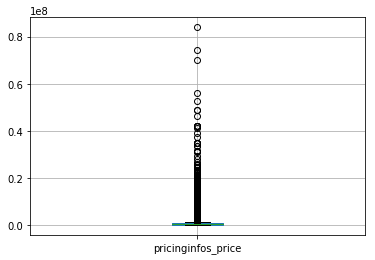

In [55]:
df.boxplot(column=['pricinginfos_price'] )

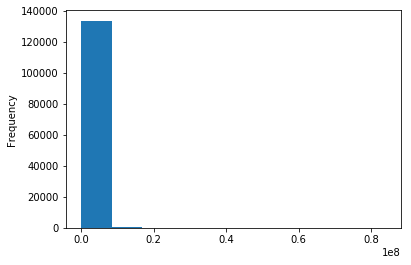

In [56]:
df.pricinginfos_price.plot.hist()

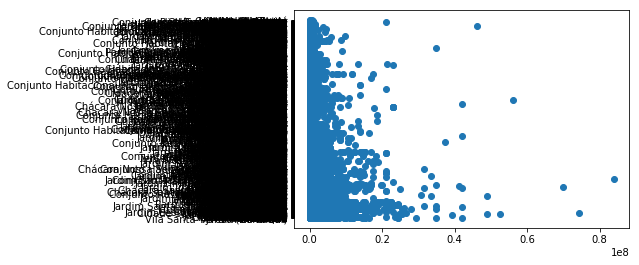

In [57]:
# Distribuição do preço de venda por bairro.
plt.scatter(df.pricinginfos_price, df.address_neighborhood)
plt.show()

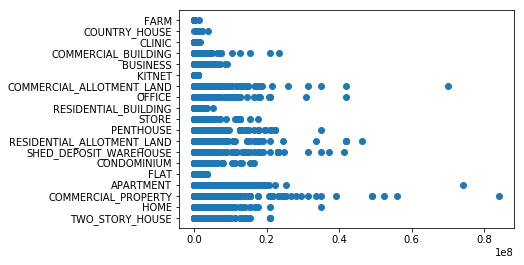

In [58]:
# Distribuição do preço de venda por tipo de imóvel.
plt.scatter(df.pricinginfos_price, df.unittypes)
plt.show()

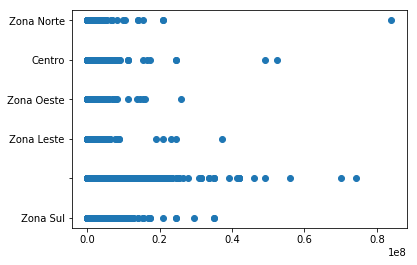

In [59]:
# Distribuição do preço de venda por Zona
plt.scatter(df.pricinginfos_price, df.address_zone)
plt.show()

In [60]:
# Estatística descritiva básica das caracterísicas quantitativas dos imóveis
df[['bathrooms', 'bedrooms', 'suites', 'parkingspaces', 'totalareas', 'usableareas']].describe()

,bathrooms,bedrooms,suites,parkingspaces,totalareas,usableareas
count,"133,051.00","130,945.00","120,347.00","129,539.00","91,132.00","133,211.00"
mean,2.38,2.33,1.11,2.44,"13,270.59",220.48
std,2.15,2.14,1.22,5.25,"3,682,657.70","5,713.50"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.00,1.00,60.00,60.00
50%,2.00,2.00,1.00,2.00,120.00,105.00
75%,3.00,3.00,2.00,3.00,250.00,200.00
max,200.00,600.00,80.00,589.00,"1,111,111,111.00","2,025,000.00"


In [61]:
# Verficando limites para outliers e medianas para tratamento de missing
features = ['bathrooms', 'bedrooms', 'suites', 'parkingspaces', 'totalareas', 'usableareas']

for i in features:
    mediana = df[i].median()
    p99 = np.nanpercentile(df[i], q=99.9)
    print('{:>13}'.format(i), ": mediana: {:,.2f}".format(mediana), "--- p99: {:,.2f}".format(p99))

    bathrooms : mediana: 2.00 --- p99: 16.00
     bedrooms : mediana: 2.00 --- p99: 10.00
       suites : mediana: 1.00 --- p99: 5.00
parkingspaces : mediana: 2.00 --- p99: 64.00
   totalareas : mediana: 120.00 --- p99: 23,000.00
  usableareas : mediana: 105.00 --- p99: 8,000.00


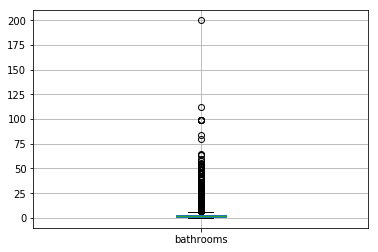

In [62]:
df.boxplot(column=['bathrooms'] )

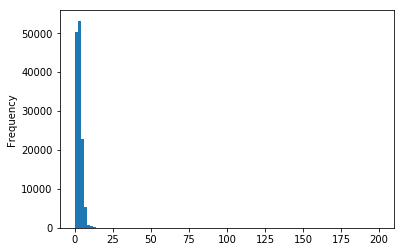

In [63]:
df.bathrooms.plot.hist(bins=100)

In [64]:
df[df.bathrooms >=25].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
5148,São Paulo,BR,,-23.55,-46.65,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Piauí,247,,01241001,Centro,99.00,2.00,2017-09-21T04:51:42.472Z,,547c0dd221,[http://images.ingaiasites.com.br/uPcrknQZvrE9...,ACTIVE,False,0.00,SALE,644.00,NaN,"1,050,000.00",nan,122.00,STANDARD,e196a2927f,1.00,"Apartamento residencial à venda, Higienópolis,...",178.00,APARTMENT,2018-10-27T07:22:56.607Z,178.00
5642,São Paulo,,,-23.65,-46.67,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Mascote,Vila Mascote,São Paulo,Avenida Damasceno Vieira,,,03178200,Zona Sul,53.00,3.00,2016-05-13T06:24:39Z,"COMPLETO, ÓTIMA OPORTUNIDADE, LOCALIZADO NO CO...",9c22d1a4e1,[http://wgc.quickfast.com/imoveisnovaopcao/fot...,ACTIVE,False,nan,SALE,553.00,NaN,"1,050,000.00",nan,0.00,STANDARD,afd2c39bce,3.00,Apartamento em São Paulo,nan,APARTMENT,2018-11-12T13:08:44.259Z,154.00
5790,São Paulo,BR,,-23.57,-46.63,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Centro>Aclimacao,Aclimação,São Paulo,Rua Baturité,,,01530030,Centro,112.00,2.00,2017-11-02T02:24:53.396Z,Terreno a 5 minutos do parque da Aclimação c/ ...,c3638f61e3,[http://www.marc.com.br/vista.imobi/fotos/1245...,ACTIVE,False,2.00,SALE,0.00,NaN,"560,000.00",nan,0.00,STANDARD,2481ecb267,0.00,SÃO PAULO - Terreno Padrão - ACLIMACAO,225.00,RESIDENTIAL_ALLOTMENT_LAND,2018-11-08T14:57:20.987Z,0.00
7697,São Paulo,,,-23.54,-46.73,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Vila Le...,Vila Leopoldina,São Paulo,Avenida José César de Oliveira,111,,05317000,,40.00,0.00,2018-12-19T07:30:36.524Z,Laje dividida em 2 conjuntos (482m² e 192m²); ...,9389896dc3,[http://static.nidoimovel.com.br/3dd48ab31d016...,ACTIVE,False,20.00,RENTAL,0.00,MONTHLY,"8,960.00","8,960.00","1,680.00",STANDARD,75dca8cd95,0.00,Edifício Metalúrgica Atlas,"1,350.00",COMMERCIAL_PROPERTY,NaN,674.00
12971,São Paulo,,,-23.59,-46.68,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Itaim Bibi,Vila Nova Conceição,São Paulo,Avenida Presidente Juscelino Kubitschek,,,04543011,,30.00,0.00,2019-02-25T05:58:29.796Z,Excelente oportunidade. Conjunto de comercial ...,065c2578b5,[http://www.coelhodafonseca.com.br/images/imov...,ACTIVE,False,5.00,RENTAL,0.00,MONTHLY,"8,400.00","8,400.00",0.00,STANDARD,19ddf2ccb1,0.00,Conjunto/Sala Comercial - Itaim/Sao Paulo,300.00,OFFICE,NaN,141.00


In [65]:
df[df.bathrooms >=75].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
5148,São Paulo,BR,,-23.55,-46.65,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Piauí,247,,01241001,Centro,99.00,2.00,2017-09-21T04:51:42.472Z,,547c0dd221,[http://images.ingaiasites.com.br/uPcrknQZvrE9...,ACTIVE,False,0.00,SALE,644.00,NaN,"1,050,000.00",nan,122.00,STANDARD,e196a2927f,1.00,"Apartamento residencial à venda, Higienópolis,...",178.00,APARTMENT,2018-10-27T07:22:56.607Z,178.00
5790,São Paulo,BR,,-23.57,-46.63,GEOMETRIC_CENTER,BR>Sao Paulo>NULL>Sao Paulo>Centro>Aclimacao,Aclimação,São Paulo,Rua Baturité,,,01530030,Centro,112.00,2.00,2017-11-02T02:24:53.396Z,Terreno a 5 minutos do parque da Aclimação c/ ...,c3638f61e3,[http://www.marc.com.br/vista.imobi/fotos/1245...,ACTIVE,False,2.00,SALE,0.00,NaN,"560,000.00",nan,0.00,STANDARD,2481ecb267,0.00,SÃO PAULO - Terreno Padrão - ACLIMACAO,225.00,RESIDENTIAL_ALLOTMENT_LAND,2018-11-08T14:57:20.987Z,0.00
44427,São Paulo,BR,,-23.55,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Itacolomi,570,,01239020,Centro,99.00,3.00,2017-09-21T04:51:52.333Z,Apartamento de 164 m² com 3 dormitórios sendo ...,f66abc12f1,[http://images.ingaiasites.com.br/viVkV0VYJBT1...,ACTIVE,False,1.00,RENTAL,979.00,MONTHLY,"4,200.00","5,180.00",0.00,STANDARD,e196a2927f,1.00,"Apartamento residencial à venda, Higienópolis,...",163.00,APARTMENT,2018-10-27T07:28:49.687Z,163.00
52422,São Paulo,BR,,-23.54,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Rio de Janeiro,321,,01240010,Centro,99.00,3.00,2017-09-21T04:53:39.352Z,,b789ac42a3,[http://images.ingaiasites.com.br/YWjJZnuruBpV...,ACTIVE,False,1.00,SALE,"1,610.00",NaN,"1,400,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Higienópolis,...",250.00,APARTMENT,2018-10-27T07:28:36.207Z,250.00
56724,São Paulo,BR,,-23.54,-46.66,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Centro>Higienopolis,Higienópolis,São Paulo,Rua Rio de Janeiro,321,,01240010,Centro,99.00,3.00,2017-09-21T04:53:22.072Z,APTO C/ TACOS E ARMS. - 26/10/2018,ce118da390,[http://images.ingaiasites.com.br/JCU8U15ZFAQ5...,ACTIVE,False,1.00,SALE,"1,819.00",NaN,"1,372,000.00",nan,0.00,STANDARD,e196a2927f,1.00,"Apartamento Residencial à venda, Higienópolis,...",216.00,APARTMENT,2018-10-27T07:37:27.168Z,216.00


In [66]:
df[df.bathrooms >=200].head()

,address_city,address_country,address_district,address_geolocation_location_lat,address_geolocation_location_lon,address_geolocation_precision,address_locationid,address_neighborhood,address_state,address_street,address_streetnumber,address_unitnumber,address_zipcode,address_zone,bathrooms,bedrooms,createdat,description,id,images,listingstatus,owner,parkingspaces,pricinginfos_businesstype,pricinginfos_monthlycondofee,pricinginfos_period,pricinginfos_price,pricinginfos_rentaltotalprice,pricinginfos_yearlyiptu,publicationtype,publisherid,suites,title,totalareas,unittypes,updatedat,usableareas
100502,São Paulo,BR,,-23.51,-46.63,ROOFTOP,BR>Sao Paulo>NULL>Sao Paulo>Zona Norte>Santana,Santana,São Paulo,Rua Aviação,98,,02012110,Zona Norte,200.00,100.00,2017-10-17T16:18:11.948Z,"5.100 m² de área construída, 70 vagas, 100 suí...",5910c4c5f5,[http://static.nidoimovel.com.br/beed13602b9b0...,ACTIVE,False,0.00,SALE,0.00,NaN,"15,399,999.00",nan,0.00,STANDARD,57ea499156,0.00,PREDIO COMERCIAL - SANTANA,"5,100.00",COMMERCIAL_PROPERTY,2018-11-08T13:47:37.104Z,"5,100.00"


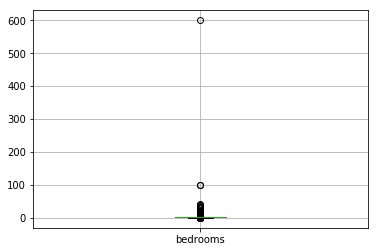

In [67]:
df.boxplot(column=['bedrooms'] )

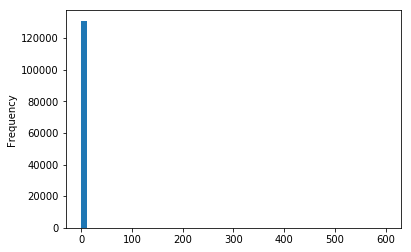

In [68]:
df.bedrooms.plot.hist(bins=50)

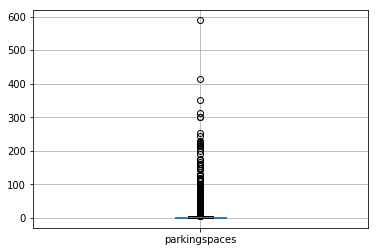

In [69]:
df.boxplot(column=['parkingspaces'] )

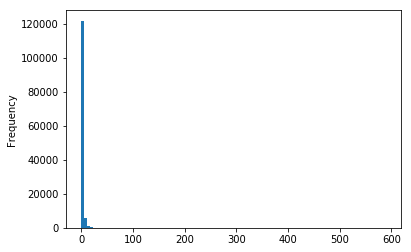

In [70]:
df.parkingspaces.plot.hist(bins=100)

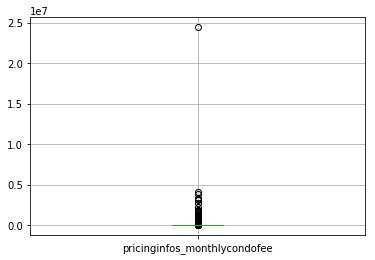

In [71]:
df.boxplot(column=['pricinginfos_monthlycondofee'] )

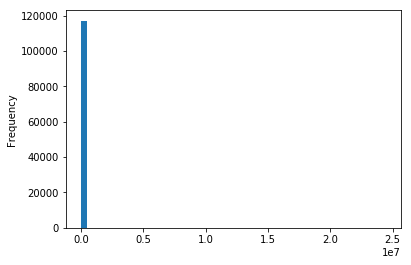

In [72]:
df.pricinginfos_monthlycondofee.plot.hist(bins=50)

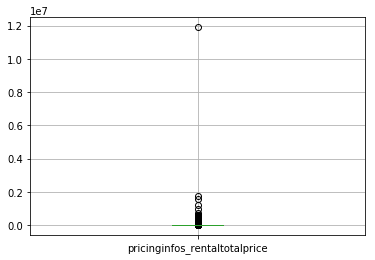

In [73]:
df.boxplot(column=['pricinginfos_rentaltotalprice'] )

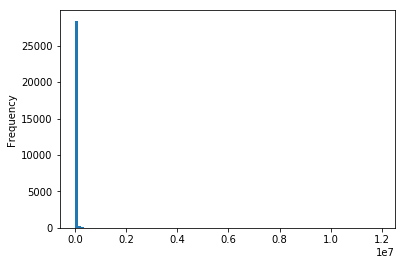

In [74]:
df.pricinginfos_rentaltotalprice.plot.hist(bins=100)

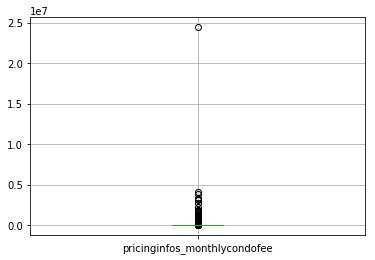

In [75]:
df.boxplot(column=['pricinginfos_monthlycondofee'] )

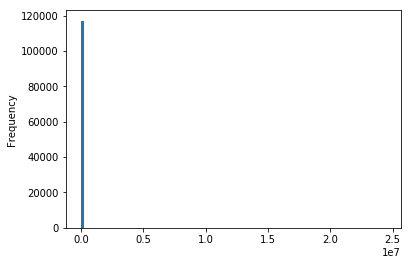

In [76]:
df.pricinginfos_monthlycondofee.plot.hist(bins=100)

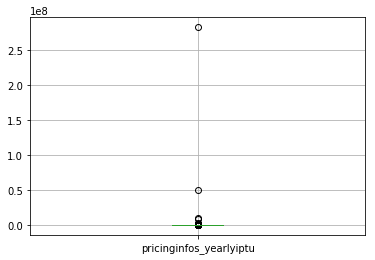

In [77]:
df.boxplot(column=['pricinginfos_yearlyiptu'] )

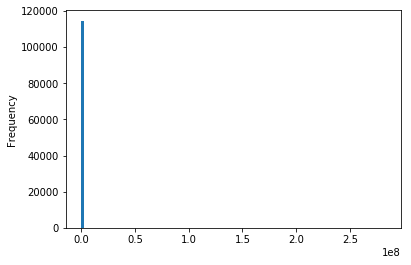

In [78]:
df.pricinginfos_yearlyiptu.plot.hist(bins=100)

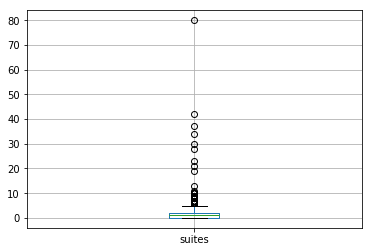

In [79]:
df.boxplot(column=['suites'] )

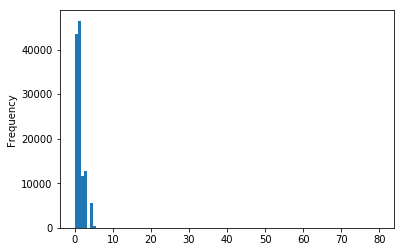

In [80]:
df.suites.plot.hist(bins=100)

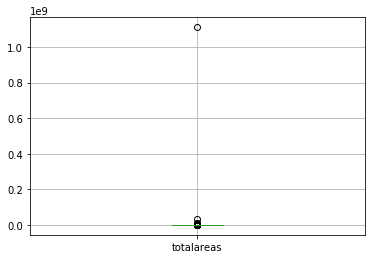

In [81]:
df.boxplot(column=['totalareas'] )

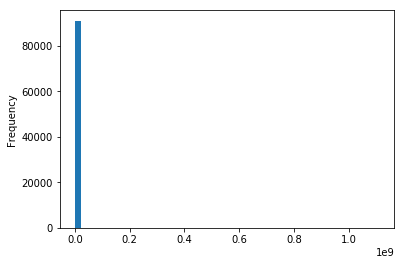

In [82]:
df.totalareas.plot.hist(bins=50)

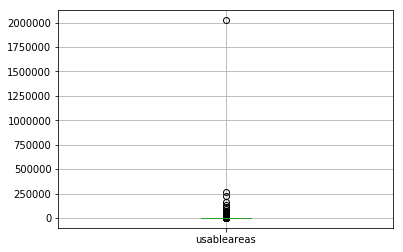

In [83]:
df.boxplot(column=['usableareas'] )

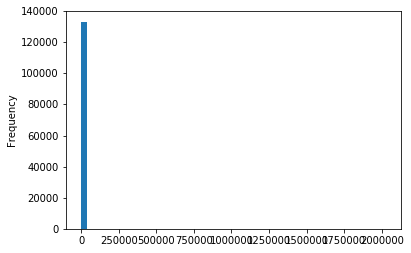

In [84]:
df.usableareas.plot.hist(bins=50)